In [1]:
require(tidyverse)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.0  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.2       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#Functions
#read.ic50 - feed it with .tsv file with 1 column = Cell_line 
#and others bieng numeric ic50 values with Drug name as colname
read.ic50 <- function(Path.to.Data){
    #Read data
    data <- read_tsv(Path.to.Data, col_names = TRUE)
    #Initiate list
    data.list <- list()
    #Append list
    for(i in 2:length(data[, -1])){
        d <- data %>% 
        select(Cell_line = 1, Drug = i) %>%  
        na.omit() %>% 
        arrange(Drug) %>%
        mutate(CL_num = seq(1, length(data$Drug), length.out = length(.$Drug)))
        d$Cell_line <- factor(d$Cell_line, levels = d$Cell_line[order(d$Drug)])
        data.list[[i]] <- d 
    }
    names(data.list) <- names(data[, -1])
    data.list[sapply(data.list, is.null)] <- NULL #Remove null lists
    return(data.list)
}

numtofac.ic50 <- function(Data.List, Cutoff){
    #Initiate list
    data.fac.list <- list()
    #Append List
    for(i in 1:length(Data.List)){
        d <- Data.List[[i]]
        #
        d$Sensitivity <- rep(0, length(d$Drug))
        d[d$Drug > (median(d$Drug) + Cutoff), ]$Sensitivity <- 
                       rep(-1, length(d[d$Drug > (median(d$Drug) + Cutoff), ]$Sensitivity)) #-1 Not_Sensitive
        d[d$Drug < (median(d$Drug) - Cutoff), ]$Sensitivity <- 
                       rep(1, length(d[d$Drug < (median(d$Drug) - Cutoff), ]$Sensitivity)) #1 Sensitive
        #
        d <- d %>%
        select(Cell_line, Sensitivity)
        colnames(d) <- c("Cell_line", paste(names(Data.List)[i]))
        data.fac.list[[i]] <- d
    }   
    names(data.fac.list) <- names(Data.List)
    return(data.fac.list)
}

#Plot ic50
#max drugs - 4
plot.ic50 <- function(Data.List, Treatment){
    if(length(Treatment) == 1){
      plot <- ggplot() +
            geom_line(data = Data.List[[Treatment]], aes(x =  CL_num, y = Drug, col = paste(Treatment))) + 
            geom_line(data = Data.List[[Treatment[1]]], aes(y = rep(median(CL_num), length(CL_num)), x = CL_num)) +
            theme_bw() + 
        scale_colour_brewer(palette = "Set1") + 
        theme(text = element_text(colour = "#49463C", hjust = 1, size = 12), 
              plot.title = element_text(face = "bold", size = 14),
              plot.subtitle = element_text(face = "italic", size = 12, colour = "grey40"),
              axis.text.y = element_text(angle = 45),
              axis.text.x = element_blank(),
              legend.position = "right", 
              panel.grid.major = element_line(colour = "grey50", size = 0.2)) + 
        labs(title = paste("IC50"),
             y = paste("IC50"),
             x = "") + 
        guides(color = guide_legend(title = "Treatment:"))  
        return(plot)
        }
    if(length(Treatment) == 2){
      plot <- ggplot() +
            geom_line(data = Data.List[[Treatment[1]]], aes(x =  CL_num, y = Drug, col = paste(Treatment[1]))) +
            geom_line(data = Data.List[[Treatment[2]]], aes(x =  CL_num, y = Drug, col = paste(Treatment[2]))) +
            geom_line(data = Data.List[[Treatment[1]]], aes(y = rep(median(CL_num), length(CL_num)), x = CL_num)) + 
            geom_line(data = Data.List[[Treatment[2]]], aes(y = rep(median(CL_num), length(CL_num)), x = CL_num)) +
            theme_bw() +
        scale_colour_brewer(palette = "Set1") + 
        theme(text = element_text(colour = "#49463C", hjust = 1, size = 12), 
              plot.title = element_text(face = "bold", size = 14),
              plot.subtitle = element_text(face = "italic", size = 12, colour = "grey40"),
              axis.text.y = element_text(angle = 45),
              axis.text.x = element_blank(),
              legend.position = "right", 
              panel.grid.major = element_line(colour = "grey50", size = 0.2)) + 
        labs(title = paste("IC50"),
             y = paste("IC50"),
             x = "") + 
        guides(color = guide_legend(title = "Treatment:")) 
        return(plot)
        }
    if(length(Treatment) == 3){
      plot <- ggplot() +
            geom_line(data = Data.List[[Treatment[1]]], aes(x =  CL_num, y = Drug, col = paste(Treatment[1]))) +
            geom_line(data = Data.List[[Treatment[2]]], aes(x =  CL_num, y = Drug, col = paste(Treatment[2]))) +
            geom_line(data = Data.List[[Treatment[3]]], aes(x =  CL_num, y = Drug, col = paste(Treatment[3]))) +
            geom_line(data = Data.List[[Treatment[1]]], aes(y = rep(median(CL_num), length(CL_num)), x = CL_num)) + 
            geom_line(data = Data.List[[Treatment[2]]], aes(y = rep(median(CL_num), length(CL_num)), x = CL_num)) +
            geom_line(data = Data.List[[Treatment[3]]], aes(y = rep(median(CL_num), length(CL_num)), x = CL_num)) +
            theme_bw() + 
        scale_colour_brewer(palette = "Set1") + 
        theme(text = element_text(colour = "#49463C", hjust = 1, size = 12), 
              plot.title = element_text(face = "bold", size = 14),
              plot.subtitle = element_text(face = "italic", size = 12, colour = "grey40"),
              axis.text.y = element_text(angle = 45),
              axis.text.x = element_blank(),
              legend.position = "right", 
              panel.grid.major = element_line(colour = "grey50", size = 0.2)) + 
        labs(title = paste("IC50"),
             y = paste("IC50"),
             x = "") + 
        guides(color = guide_legend(title = "Treatment:"))  
        return(plot)
        }
    if(length(Treatment) == 4){
      plot <- ggplot() +
            geom_line(data = Data.List[[Treatment[1]]], aes(x =  CL_num, y = Drug, col = paste(Treatment[1]))) +
            geom_line(data = Data.List[[Treatment[2]]], aes(x =  CL_num, y = Drug, col = paste(Treatment[2]))) +
            geom_line(data = Data.List[[Treatment[3]]], aes(x =  CL_num, y = Drug, col = paste(Treatment[1]))) +
            geom_line(data = Data.List[[Treatment[4]]], aes(x =  CL_num, y = Drug, col = paste(Treatment[2]))) +
            theme_bw() + 
            geom_line(data = Data.List[[Treatment[1]]], aes(y = rep(median(CL_num), length(CL_num)), x = CL_num)) + 
            geom_line(data = Data.List[[Treatment[2]]], aes(y = rep(median(CL_num), length(CL_num)), x = CL_num)) +
            geom_line(data = Data.List[[Treatment[3]]], aes(y = rep(median(CL_num), length(CL_num)), x = CL_num)) + 
            geom_line(data = Data.List[[Treatment[4]]], aes(y = rep(median(CL_num), length(CL_num)), x = CL_num)) +
        scale_colour_brewer(palette = "Set1") + 
        theme(text = element_text(colour = "#49463C", hjust = 1, size = 12), 
              plot.title = element_text(face = "bold", size = 14),
              plot.subtitle = element_text(face = "italic", size = 12, colour = "grey40"),
              axis.text.y = element_text(angle = 45),
              axis.text.x = element_blank(),
              legend.position = "right", 
              panel.grid.major = element_line(colour = "grey50", size = 0.2)) + 
        labs(title = paste("IC50"),
             y = paste("IC50"),
             x = "") + 
        guides(color = guide_legend(title = "Treatment:"))  
        return(plot)
        }
    
}


In [3]:
Path.to.Data <- "/home/kotlov_group/DATA/900_cell_lines/ic50.tsv"
data <- read_tsv(Path.to.Data, col_names = TRUE)
data

Parsed with column specification:
cols(
  .default = col_double(),
  Cell_line = col_character(),
  Tissue = col_character()
)
See spec(...) for full column specifications.


Cell_line,Tissue,17-AAG,AEW541,AZD0530,AZD6244,Erlotinib,Irinotecan,L-685458,Lapatinib,⋯,PD-0332991,PF2341066,PHA-665752,PLX4720,RAF265,Sorafenib,TAE684,TKI258,Topotecan,ZD-6474
AU565,BREAST,0.02334860,8.0000000,8.0000000,8.000000,8.0000000,NA,3.0600679,0.1832095,⋯,7.564302,8.0000000,8.000000,8,3.2956812,8.0000000,8.0000000,7.390177,0.13572697,8.0000000
BT-20,BREAST,8.00000000,8.0000000,7.0551982,8.000000,8.0000000,0.26911429,8.0000000,8.0000000,⋯,8.000000,8.0000000,8.000000,8,8.0000000,8.0000000,7.6263747,8.000000,1.10175264,3.6630716
BT-474,BREAST,0.04472673,8.0000000,3.0937493,8.000000,8.0000000,NA,4.4680886,0.1161832,⋯,8.000000,8.0000000,6.848635,8,8.0000000,6.4629507,8.0000000,8.000000,8.00000000,8.0000000
BT-549,BREAST,0.02039723,5.4452510,8.0000000,8.000000,8.0000000,0.12476116,8.0000000,8.0000000,⋯,8.000000,7.5687194,8.000000,8,1.1558797,6.4086947,5.3957067,3.910805,0.07929435,4.1045117
CAL-85-1,BREAST,0.17533991,2.2811565,1.5806607,3.014280,0.8705145,0.26240697,8.0000000,1.8995482,⋯,8.000000,8.0000000,8.000000,8,0.6506943,8.0000000,8.0000000,8.000000,0.60953158,0.8272558
CAMA-1,BREAST,0.14104521,8.0000000,8.0000000,8.000000,8.0000000,0.34567094,6.5854416,8.0000000,⋯,8.000000,8.0000000,8.000000,8,6.1423721,8.0000000,8.0000000,8.000000,8.00000000,8.0000000
EFM-19,BREAST,0.05810367,8.0000000,5.3526945,8.000000,8.0000000,0.92229032,8.0000000,8.0000000,⋯,8.000000,7.6534858,7.446472,8,2.1975389,8.0000000,8.0000000,8.000000,1.28874552,4.3542523
HCC1187,BREAST,1.53147042,8.0000000,8.0000000,8.000000,8.0000000,NA,0.6436753,8.0000000,⋯,8.000000,8.0000000,8.000000,8,7.0121546,8.0000000,8.0000000,8.000000,6.19972467,8.0000000
HCC1395,BREAST,8.00000000,8.0000000,8.0000000,8.000000,8.0000000,NA,8.0000000,8.0000000,⋯,NA,8.0000000,8.000000,8,NA,8.0000000,8.0000000,8.000000,8.00000000,8.0000000
HCC1569,BREAST,0.20115508,8.0000000,8.0000000,8.000000,8.0000000,0.72344232,8.0000000,8.0000000,⋯,8.000000,8.0000000,8.000000,8,8.0000000,8.0000000,8.0000000,8.000000,4.64316368,8.0000000


In [4]:
check <- read.ic50("/home/kotlov_group/DATA/900_cell_lines/ic50.tsv")

Parsed with column specification:
cols(
  .default = col_double(),
  Cell_line = col_character(),
  Tissue = col_character()
)
See spec(...) for full column specifications.
Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”Warning message:
“Unknown or uninitialised column: 'Drug'.”W

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'CL_num' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(c

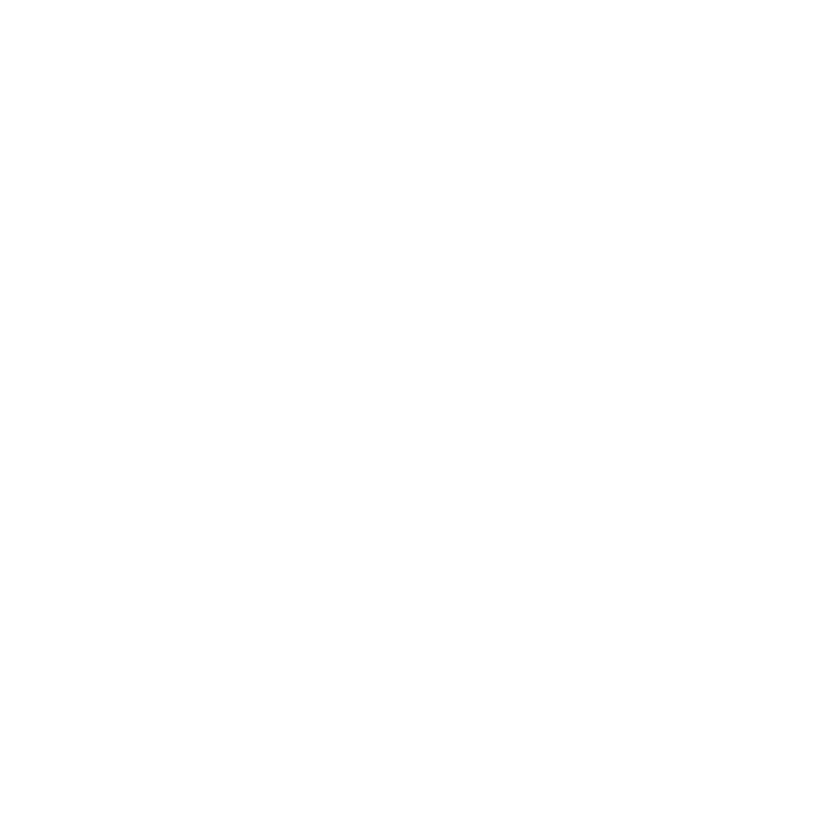

In [5]:
plot.ic50(check, c('Cetuximab', 'Erlotinib'))

In [196]:
check.fac <- numtofac.ic50(check, 0.6)

In [197]:
check.fac

Cell_line,TAK-715
ALL-SIL,1
EoL-1-cell,1
MY-M12,1
GDM-1,1
LAMA-84,1
SUP-B15,1
MEG-01,1
KYAE-1,1
JURL-MK1,1
BV-173,1


In [ ]:
#Initiate list
data.list <- list()
for(i in 2:length(data[, -1])){
    d <- data %>% 
    select(Cell_line, Drug = .[, i]) %>%  
    na.omit() %>% 
    arrange(Drug) %>%
    mutate(CL_num = seq(1, length(data$Drug), length.out = length(.$Drug)))
    d$Cell_line <- factor(d$Cell_line, levels = d$Cell_line[order(d$Drug)])
    data.list[[i]] <- d
}

In [ ]:
plot.ic50 <- function(Data.List, Drug, Cutoff.Range){
    ggplot() +
        geom_line(data = Data.List, aes(x =  CL_num, y = Drug, col = "Erlotinib (n = 36)")) + 
}



ggplot() +
geom_line(data = d1, aes(x =  CL_num, y = Drug, col = "Erlotinib (n = 36)")) + 
geom_line(data = d2, aes(x = CL_num, y = Drug, col = "EKB-569 (n = 216)")) + 
geom_line(data = d3, aes(x =  CL_num, y = Drug, col = "Gefitinib (n = 192)")) + 
geom_line(data = d4, aes(x = CL_num, y = Drug, col = "Cetuximab (n = 209)")) + 
theme_bw() + 
scale_colour_brewer(palette = "Set1") + 
theme(text = element_text(colour = "#49463C", hjust = 1, size = 12), 
      plot.title = element_text(face = "bold", size = 14),
      plot.subtitle = element_text(face = "italic", size = 12, colour = "grey40"),
      axis.text.y = element_text(angle = 45),
      axis.text.x = element_blank(),
      legend.position = "right", 
      panel.grid.major = element_line(colour = "grey50", size = 0.2)) + 
labs(title = paste("IC50 across cancer cell lines"), 
     subtitle = paste("anti-EGFR Treatment"),
     y = paste("IC50"),
     x = "") + 
guides(color = guide_legend(title = "Treatment:"))

In [169]:
d1 <- data %>% 
select(Cell_line, Drug = Erlotinib) %>%  
na.omit() %>% 
arrange(Drug) %>%
mutate(CL_num = seq(1, 216, length.out = 36))
d1$Cell_line <- factor(d1$Cell_line, levels = d1$Cell_line[order(d1$Drug)])

d2 <- data %>% 
select(Cell_line, Drug = `EKB-569`) %>%  
na.omit() %>% 
arrange(Drug) %>%
mutate(CL_num = seq(1, 216, length.out = 216)) 
d2$Cell_line <- factor(d2$Cell_line, levels = d2$Cell_line[order(d2$Drug)])

d3 <- data %>% 
select(Cell_line, Drug = Gefitinib) %>%  
na.omit() %>% 
arrange(Drug) %>%
mutate(CL_num = seq(1, 216, length.out = 192)) 
d3$Cell_line <- factor(d3$Cell_line, levels = d3$Cell_line[order(d3$Drug)])

d4 <- data %>% 
select(Cell_line, Drug = Cetuximab) %>%  
na.omit() %>% 
arrange(Drug) %>%
mutate(CL_num = seq(1, 216, length.out = 209)) 
d4$Cell_line <- factor(d4$Cell_line, levels = d4$Cell_line[order(d4$Drug)])

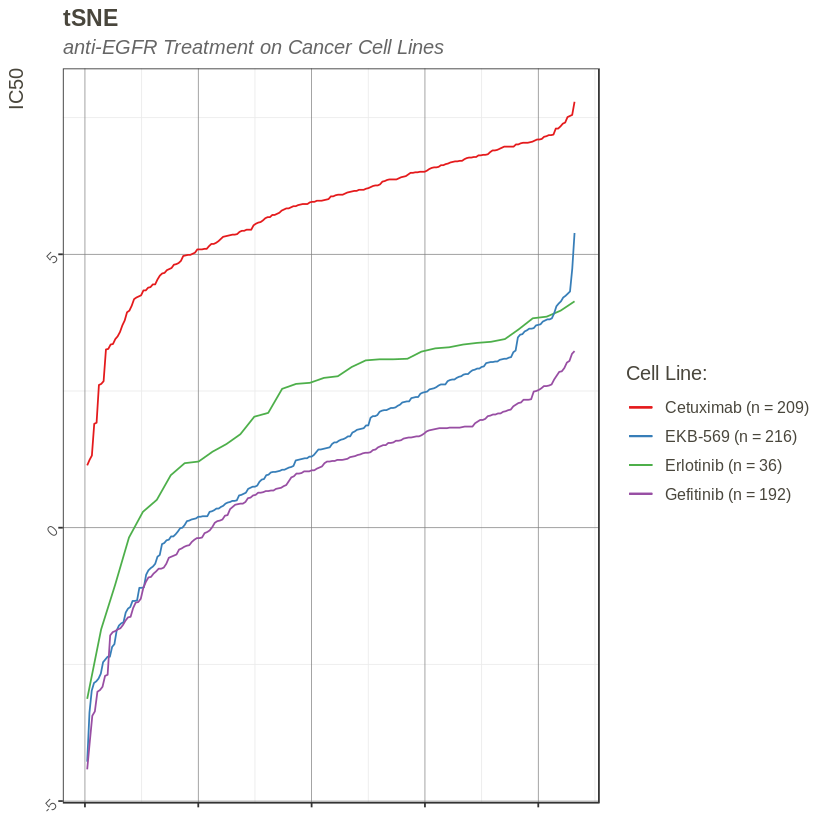

In [182]:
ggplot() +
geom_line(data = d1, aes(x =  CL_num, y = Drug, col = "Erlotinib (n = 36)")) + 
geom_line(data = d2, aes(x = CL_num, y = Drug, col = "EKB-569 (n = 216)")) + 
geom_line(data = d3, aes(x =  CL_num, y = Drug, col = "Gefitinib (n = 192)")) + 
geom_line(data = d4, aes(x = CL_num, y = Drug, col = "Cetuximab (n = 209)")) + 
theme_bw() + 
scale_colour_brewer(palette = "Set1") + 
theme(text = element_text(colour = "#49463C", hjust = 1, size = 12), 
      plot.title = element_text(face = "bold", size = 14),
      plot.subtitle = element_text(face = "italic", size = 12, colour = "grey40"),
      axis.text.y = element_text(angle = 45),
      axis.text.x = element_blank(),
      legend.position = "right", 
      panel.grid.major = element_line(colour = "grey50", size = 0.2)) + 
labs(title = paste("IC50 across cancer cell lines"), 
     subtitle = paste("anti-EGFR Treatment"),
     y = paste("IC50"),
     x = "") + 
guides(color = guide_legend(title = "Treatment:"))

In [142]:
d1$Sensitivity <- rep(0, length(d1$Drug))
d1[d1$Drug > (median(d1$Drug) + 1), ]$Sensitivity <- 
rep("Not responsive", length(d1[d1$Drug > (median(d1$Drug) + 1), ]$Sensitivity))
d1[d1$Drug < (median(d1$Drug) - 1), ]$Sensitivity <- 
rep("Responsive", length(d1[d1$Drug < (median(d1$Drug) - 1), ]$Sensitivity))
d1[d1$Sensitivity == 0, ]$Sensitivity <- 
rep("inbetween", length(d1[d1$Sensitivity == 0, ]$Sensitivity))
d1 <- d1 %>% 
rename(Gefitinib = Sensitivity)

In [143]:
data.gef <- d1

In [185]:
data.cat <- full_join(data.erl, data.ekb, by = "Cell_line") %>% 
full_join(., data.gef,, by = "Cell_line") %>%
full_join(., data.cet, by = "Cell_line")
data.cat <- data.cat %>% select(-matches("Drug"))

Warning message:
“Column `Cell_line` joining factors with different levels, coercing to character vector”Warning message:
“Column `Cell_line` joining character vector and factor, coercing into character vector”Warning message:
“Column `Cell_line` joining character vector and factor, coercing into character vector”

In [194]:
data.cat[is.na(data.cat)] <- "-"

In [195]:
data.cat$Pos.Response <- 
str_count(str_c(data.cat$Erlotinib, data.cat$`EKB-569`, data.cat$Gefitinib, data.cat$Cetuximab), "Responsive")
data.cat$Neg.Response <- 
str_count(str_c(data.cat$Erlotinib, data.cat$`EKB-569`, data.cat$Gefitinib, data.cat$Cetuximab), "Not responsive")


In [12]:
data.cat %>% arrange(desc(Pos.Response))

Cell_line,Erlotinib,EKB-569,Gefitinib,Cetuximab,Pos.Response,Neg.Response
BB30-HNC_aero_dig_tract,Responsive,Responsive,Responsive,Responsive,4,0
EKVX_lung_NSCLC,Responsive,Not responsive,Responsive,Responsive,3,1
NCI-H1869_lung_NSCLC,Responsive,Responsive,inbetween,Responsive,3,0
C2BBe1_large_intestine,Responsive,Responsive,inbetween,Responsive,3,0
H3255_lung_NSCLC,-,Responsive,Responsive,Responsive,3,0
H3118_aero_dig_tract,-,Responsive,Responsive,Responsive,3,0
PC-3 [JPC-3]_lung_NSCLC,-,Responsive,Responsive,Responsive,3,0
EMC-BAC-1_lung_NSCLC,-,Responsive,Responsive,Responsive,3,0
CAL-12T_lung_NSCLC,-,Responsive,Responsive,Responsive,3,0
PCI-4B_aero_dig_tract,-,Responsive,Responsive,Responsive,3,0


In [11]:
data.cat <- read_tsv("/home/kotlov_group/DATA/1000_cell_lines/Prepared/ic50.cat.tsv", col_names = TRUE)

Parsed with column specification:
cols(
  Cell_line = col_character(),
  Erlotinib = col_character(),
  `EKB-569` = col_character(),
  Gefitinib = col_character(),
  Cetuximab = col_character(),
  Pos.Response = col_double(),
  Neg.Response = col_double()
)


In [15]:
mut <- read_tsv("/home/kotlov_group/DATA/1000_cell_lines/mutations.maf", col_names = TRUE)
mut

Parsed with column specification:
cols(
  Hugo_Symbol = col_character(),
  Variant_Classification = col_character(),
  Tumor_Sample_Barcode = col_character(),
  `Cancer Type` = col_character(),
  Transcript_ID = col_character(),
  HGVSc = col_character(),
  HGVSp_Short = col_character(),
  COSMIC_ID = col_double()
)


Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,Cancer Type,Transcript_ID,HGVSc,HGVSp_Short,COSMIC_ID
A1BG,Missense_Mutation,KARPAS-45,ALL,ENST00000263100,c.842A>G,p.Y281C,907272
A1BG,Missense_Mutation,Jurkat,ALL,ENST00000263100,c.589G>A,p.A197T,998184
A1BG,Missense_Mutation,KARPAS-45,ALL,ENST00000263100,c.571G>A,p.A191T,907272
A1BG,Missense_Mutation,HT-115,COAD/READ,ENST00000263100,c.1456G>A,p.D486N,907289
A1BG,Missense_Mutation,KM12,COAD/READ,ENST00000263100,c.770C>A,p.T257N,905989
A1BG,Missense_Mutation,RKO,COAD/READ,ENST00000263100,c.269G>A,p.R90H,909698
A1BG,Missense_Mutation,HCC2998,COAD/READ,ENST00000263100,c.137C>T,p.T46M,905971
A1BG,Frame_Shift_Del,T84,COAD/READ,ENST00000263100,c.121_122insA,p.P41fs*33,909761
A1BG,Missense_Mutation,JSC-1,DLBC,ENST00000263100,c.747G>T,p.E249D,1327769
A1BG,Nonsense_Mutation,KCL-22,LCML,ENST00000263100,c.552C>A,p.Y184*,1330931


In [22]:
table(mut.filt$EGFR_status)


    Mutated Not Mutated 
         24      158545 

In [21]:
mut.filt <- mut %>% 
filter(Tumor_Sample_Barcode %in% str_split_fixed(data.cat$Cell_line, "_", n = 2)[,1]) %>% 
select(Tumor_Sample_Barcode, Hugo_Symbol, Variant_Classification) %>%
mutate(EGFR_status = ifelse(Hugo_Symbol == "EGFR", "Mutated", "Not Mutated"))

In [24]:
mut.egfr <- mut.filt %>% 
filter(EGFR_status == "Mutated") %>%
pull(Tumor_Sample_Barcode)

In [29]:
data.cat.upd <- data.cat %>% 
mutate(CL = str_split_fixed(Cell_line, "_", n = 2)[, 1], 
       EGFR_status = ifelse(CL %in% mut.egfr, "Mutated", "Not Mutated")) %>%
select(-CL)

print(paste(length(data.cat.upd[data.cat.upd$Pos.Response > 1 & data.cat.upd$EGFR_status == "Not Mutated", ]$EGFR_status), 
            length(data.cat.upd[data.cat.upd$Neg.Response > 1 & data.cat.upd$EGFR_status == "Not Mutated", ]$EGFR_status)))

[1] "42 21"


In [31]:
head(data.cat.upd)

Cell_line,Erlotinib,EKB-569,Gefitinib,Cetuximab,Pos.Response,Neg.Response,EGFR_status
NCI-H1648_lung_NSCLC,Responsive,inbetween,Responsive,inbetween,2,0,Not Mutated
BB30-HNC_aero_dig_tract,Responsive,Responsive,Responsive,Responsive,4,0,Not Mutated
EKVX_lung_NSCLC,Responsive,Not responsive,Responsive,Responsive,3,1,Not Mutated
LS-513_large_intestine,Responsive,Responsive,inbetween,inbetween,2,0,Not Mutated
A253_aero_dig_tract,Responsive,inbetween,inbetween,inbetween,1,0,Not Mutated
NCI-H1869_lung_NSCLC,Responsive,Responsive,inbetween,Responsive,3,0,Not Mutated


In [32]:
write_tsv(data.cat.upd, "/home/kotlov_group/DATA/1000_cell_lines/Prepared/response.tsv", col_names = TRUE)

In [129]:
data <- read_tsv("/home/kotlov_group/DATA/900_cell_lines/ic50s.tsv", col_names = TRUE)
head(data)

Parsed with column specification:
cols(
  `CCLE Cell Line Name` = col_character(),
  `Primary Cell Line Name` = col_character(),
  Compound = col_character(),
  Target = col_character(),
  EC50 = col_double(),
  IC50 = col_double()
)


CCLE Cell Line Name,Primary Cell Line Name,Compound,Target,EC50,IC50
1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,17-AAG,HSP90,0.19367672,0.22807844
22RV1_PROSTATE,22Rv1,17-AAG,HSP90,0.26721454,0.32970169
42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,17-AAG,HSP90,0.05208059,0.05303809
5637_URINARY_TRACT,5637,17-AAG,HSP90,0.06090715,0.07082279
639V_URINARY_TRACT,639-V,17-AAG,HSP90,0.14792989,0.15009449
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,697,17-AAG,HSP90,0.37833494,0.42257124


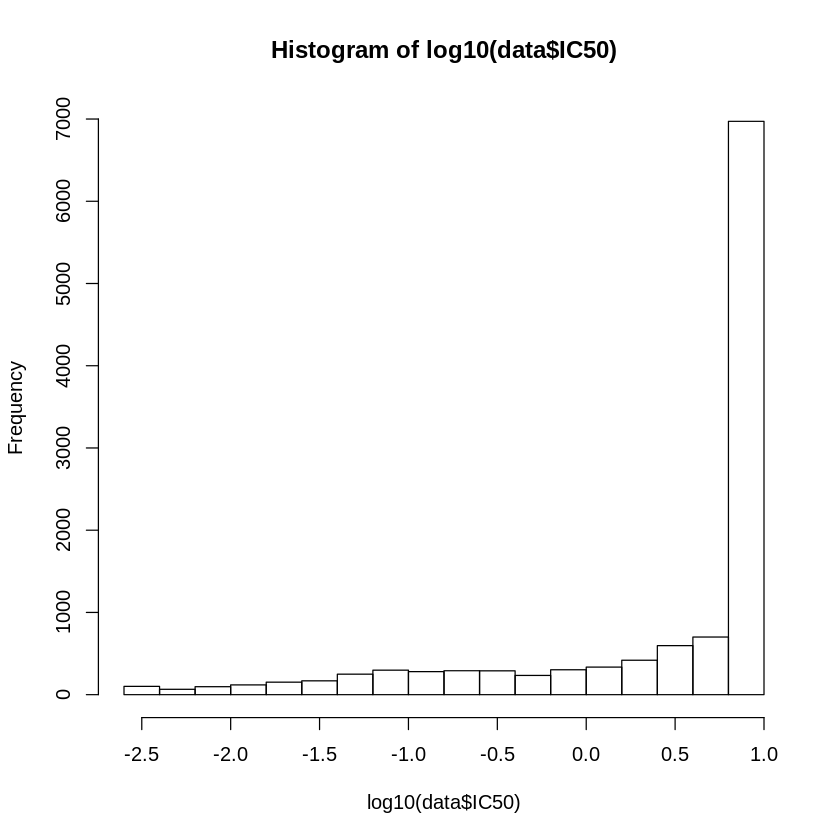

In [130]:
hist(log10(data$`IC50`))

In [131]:
data <- data %>%
filter(Target == "EGFR") %>%
filter(., grepl(paste(c("*LUNG", "*LARGE_INTESTINE", "*BREAST"), collapse = "|"), `CCLE Cell Line Name`)) %>%
mutate(IC50 = log10(IC50)) %>%
select(`CCLE Cell Line Name`, Compound, IC50) %>% 
rename(Cell_line = `CCLE Cell Line Name`) %>%
spread(key = Compound, value = IC50)
head(data)

Cell_line,Erlotinib,Lapatinib,ZD-6474
A549_LUNG,0.90309,0.6260576,0.9030900
AU565_BREAST,0.90309,-0.7370520,0.9030900
BT20_BREAST,0.90309,0.9030900,0.5638454
BT474_BREAST,0.90309,-0.9348565,0.9030900
BT549_BREAST,0.90309,0.9030900,0.6132615
C2BBE1_LARGE_INTESTINE,0.90309,0.6127144,0.1636863


In [104]:
length(data %>% select(Erlotinib) %>% na.omit %>% pull(Erlotinib))

[1] 147

In [105]:
length(data %>% select(Lapatinib) %>% na.omit %>% pull(Lapatinib))

[1] 147

In [106]:
length(data %>% select(`ZD-6474`) %>% na.omit %>% pull(`ZD-6474`))

[1] 147

In [143]:
d1 <- data %>% 
select(Cell_line, Drug = Erlotinib) %>%  
na.omit() %>% 
arrange(Drug) %>%
mutate(CL_num = seq(1, dim(.)[1], length.out = dim(data)[1]))
d1$Cell_line <- factor(d1$Cell_line, levels = d1$Cell_line[order(d1$Drug)])

d2 <- data %>% 
select(Cell_line, Drug = Lapatinib) %>%  
na.omit() %>% 
arrange(Drug) %>%
mutate(CL_num = seq(1, dim(.)[1], length.out = dim(data)[1])) 
d2$Cell_line <- factor(d2$Cell_line, levels = d2$Cell_line[order(d2$Drug)])

d3 <- data %>% 
select(Cell_line, Drug = `ZD-6474`) %>%  
na.omit() %>% 
arrange(Drug) %>%
mutate(CL_num = seq(1, dim(.)[1], length.out = dim(data)[1])) 
d3$Cell_line <- factor(d3$Cell_line, levels = d3$Cell_line[order(d3$Drug)])

ERROR: Error: Don't know how to add RHS to a theme object


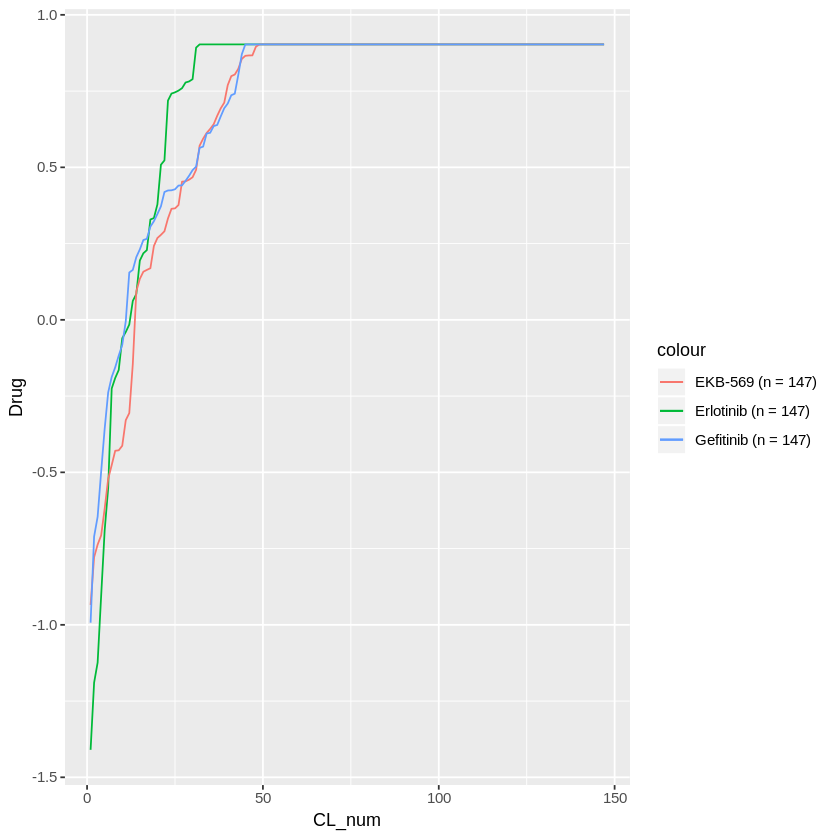

In [133]:
ggplot() +
geom_line(data = d1, aes(x =  CL_num, y = Drug, col = "Erlotinib (n = 147)")) + 
geom_line(data = d2, aes(x = CL_num, y = Drug, col = "EKB-569 (n = 147)")) + 
geom_line(data = d3, aes(x =  CL_num, y = Drug, col = "Gefitinib (n = 147)"))
theme_bw() + 
scale_colour_brewer(palette = "Set1") + 
theme(text = element_text(colour = "#49463C", hjust = 1, size = 12), 
      plot.title = element_text(face = "bold", size = 14),
      plot.subtitle = element_text(face = "italic", size = 12, colour = "grey40"),
      axis.text.y = element_text(angle = 45),
      axis.text.x = element_blank(),
      legend.position = "right", 
      panel.grid.major = element_line(colour = "grey50", size = 0.2)) + 
labs(title = paste("IC50 across cancer cell lines"), 
     subtitle = paste("anti-EGFR Treatment"),
     y = paste("IC50"),
     x = "") + 
guides(color = guide_legend(title = "Treatment:"))

In [144]:
d1$Sensitivity <- rep(0, length(d1$Drug))
d1[d1$Drug > 0.5, ]$Sensitivity <- 
rep("Not responsive", length(d1[d1$Drug > 0.5, ]$Sensitivity))
d1[d1$Drug < 0.25, ]$Sensitivity <- 
rep("Responsive", length(d1[d1$Drug < 0.25, ]$Sensitivity))
d1[d1$Sensitivity == 0, ]$Sensitivity <- 
rep("inbetween", length(d1[d1$Sensitivity == 0, ]$Sensitivity))
d1 <- d1 %>% 
rename(Erlotinib = Sensitivity)

d2$Sensitivity <- rep(0, length(d1$Drug))
d2[d2$Drug > 0.5, ]$Sensitivity <- 
rep("Not responsive", length(d2[d2$Drug > 0.5, ]$Sensitivity))
d2[d2$Drug < 0.25, ]$Sensitivity <- 
rep("Responsive", length(d2[d2$Drug < 0.25, ]$Sensitivity))
d2[d2$Sensitivity == 0, ]$Sensitivity <- 
rep("inbetween", length(d2[d2$Sensitivity == 0, ]$Sensitivity))
d2 <- d2 %>% 
rename(Lapatinib = Sensitivity)

d3$Sensitivity <- rep(0, length(d3$Drug))
d3[d3$Drug > 0.5, ]$Sensitivity <- 
rep("Not responsive", length(d3[d3$Drug > 0.5, ]$Sensitivity))
d3[d3$Drug < 0.25, ]$Sensitivity <- 
rep("Responsive", length(d3[d3$Drug < 0.25, ]$Sensitivity))
d3[d3$Sensitivity == 0, ]$Sensitivity <- 
rep("inbetween", length(d3[d3$Sensitivity == 0, ]$Sensitivity))
d3 <- d3 %>% 
rename(`ZD-6474` = Sensitivity)


In [145]:
head(d1)

Cell_line,Drug,CL_num,Erlotinib
HCC827_LUNG,-1.4098503,1,Responsive
PC14_LUNG,-1.1896427,2,Responsive
NCIH3255_LUNG,-1.1239080,3,Responsive
HCC4006_LUNG,-0.9056952,4,Responsive
NCIH1666_LUNG,-0.6904379,5,Responsive
HCC2935_LUNG,-0.5516432,6,Responsive


In [148]:
data.cat <- full_join(d1, d2, by = "Cell_line") %>% 
full_join(., d3,, by = "Cell_line")
data.cat <- data.cat %>% 
select(-matches("Drug")) %>%
select(-matches("CL"))
head(data.cat)

Warning message:
“Column `Cell_line` joining factors with different levels, coercing to character vector”Warning message:
“Column `Cell_line` joining character vector and factor, coercing into character vector”

Cell_line,Erlotinib,Lapatinib,ZD-6474
HCC827_LUNG,Responsive,Responsive,Responsive
PC14_LUNG,Responsive,inbetween,Responsive
NCIH3255_LUNG,Responsive,Responsive,Responsive
HCC4006_LUNG,Responsive,inbetween,Responsive
NCIH1666_LUNG,Responsive,Responsive,Responsive
HCC2935_LUNG,Responsive,Responsive,Responsive


In [150]:
data.cat$Pos.Response <- 
str_count(str_c(data.cat$Erlotinib, data.cat$Lapatinib, data.cat$`ZD-6474`), "Responsive")
data.cat$Neg.Response <- 
str_count(str_c(data.cat$Erlotinib, data.cat$Lapatinib, data.cat$`ZD-6474`), "Not responsive")
head(data.cat)

Cell_line,Erlotinib,Lapatinib,ZD-6474,Pos.Response,Neg.Response
HCC827_LUNG,Responsive,Responsive,Responsive,3,0
PC14_LUNG,Responsive,inbetween,Responsive,2,0
NCIH3255_LUNG,Responsive,Responsive,Responsive,3,0
HCC4006_LUNG,Responsive,inbetween,Responsive,2,0
NCIH1666_LUNG,Responsive,Responsive,Responsive,3,0
HCC2935_LUNG,Responsive,Responsive,Responsive,3,0


In [167]:
write_tsv(data.cat, "/home/kotlov_group/DATA/900_cell_lines/Prepared/ic50.cat.tsv", col_names = TRUE)